# Analyzing, and Visualizing Data
*We Rate Dogs dataset after wrangling*.. *Saeed Falana Ramallah,Palestine*

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [2]:
# Change the style of the plots (http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)
matplotlib.style.use('ggplot')

In [3]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                   1994 non-null int64
tweet_date                 1994 non-null object
tweet_source               1994 non-null object
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
dog_stage                  1994 non-null object
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dog_name                   1369 non-null object
dog_gender                 862 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 249.3+ KB


In [4]:
# Convert columns to their appropriate types and set the tweet_date as an index

df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['tweet_date'] = pd.to_datetime(df_master.tweet_date)
df_master['tweet_source'] = df_master['tweet_source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

df_master = df_master.set_index('tweet_date')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2015-11-19 18:13:27 to 2016-06-16 01:25:36
Data columns (total 15 columns):
tweet_id                   1994 non-null object
tweet_source               1994 non-null category
tweet_text                 1994 non-null object
tweet_url                  1994 non-null object
tweet_picture_predicted    1994 non-null object
tweet_favorites            1994 non-null int64
tweet_retweets             1994 non-null int64
user_followers             1994 non-null int64
dog_stage                  1994 non-null category
dog_breed                  1686 non-null object
confidence_level           1994 non-null float64
rating_numerator           1994 non-null float64
dogs_count                 1994 non-null int64
dog_name                   1369 non-null object
dog_gender                 862 non-null category
dtypes: category(3), float64(2), int64(4), object(6)
memory usage: 208.7+ KB


### Plot the correlation map to see the relationship between our variables

Text(0.5,1,'Correlation Map')

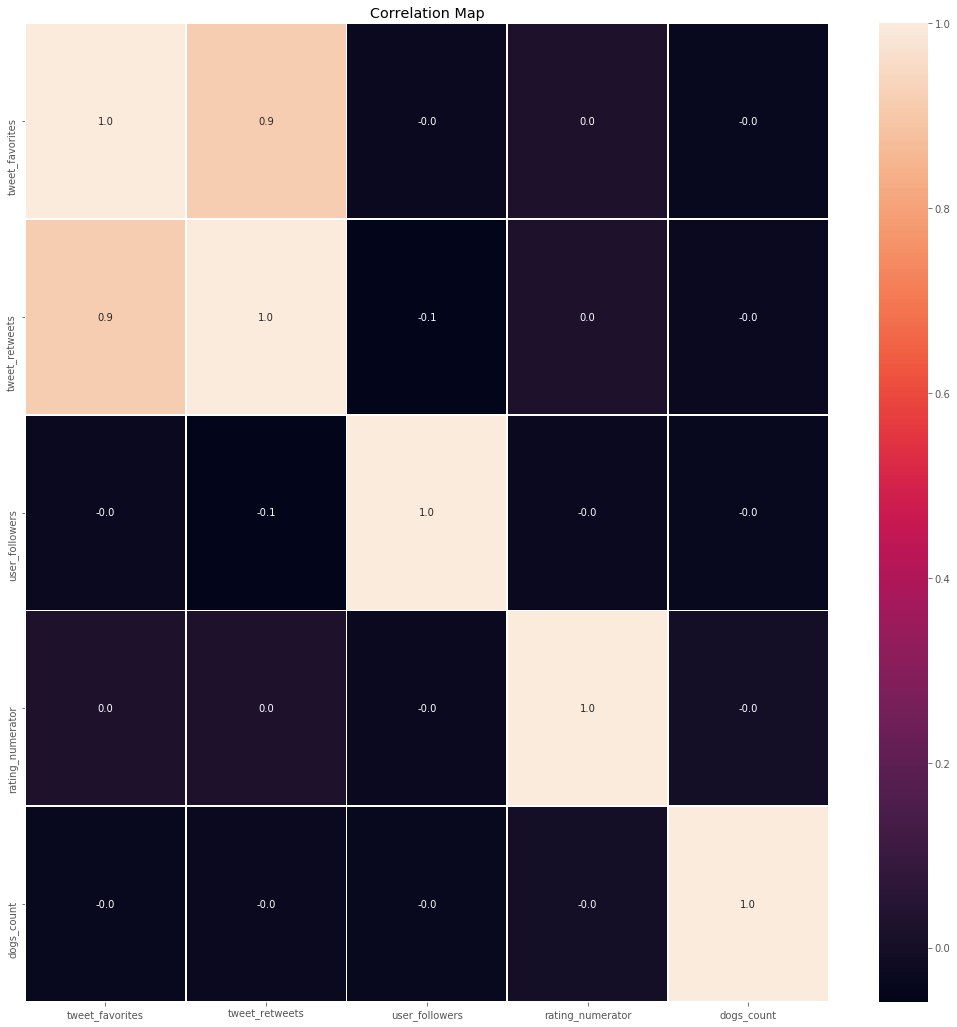

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_master[['tweet_source', 'tweet_favorites',
                       'tweet_retweets', 'user_followers', 
                       'rating_numerator', 'dogs_count']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

- The only strong correlation we see here is between tweet_favorites and tweet_retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.1 (this seems the opposite of normal prediction)
- More dogs in the picture doesn't mean high rating
- Rating don't get affected with any other variable from the ones we ploted

*let's dig more starting with the relation between tweet_favorites and tweet retweet*

### tweet_favorites and tweet_retweet

Text(0.5,1,'Retweets and favorites Scatter plot')

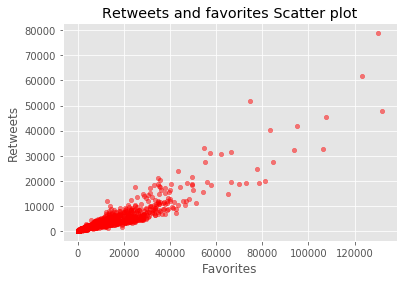

In [6]:
df_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

- As the correlation map shows if the count of retweet is high the count of favorites go high

In [7]:
top_retweet_count_url = df_master.tweet_url[df_master.tweet_retweets == max(df_master.tweet_retweets)][0]
print("The maximum number of retweet is: {}, for the tweet: {}".format(max(df_master.tweet_retweets), top_retweet_count_url))

top_favorites_count_url = df_master.tweet_url[df_master.tweet_favorites == max(df_master.tweet_favorites)][0]
print("The maximum number of favorites is: {}, for the tweet: {}".format(max(df_master.tweet_favorites), top_favorites_count_url))

The maximum number of retweet is: 78809, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1
The maximum number of favorites is: 131903, for the tweet: https://twitter.com/dog_rates/status/822872901745569793/photo/1


### Rating System

Text(0,0.5,'Rating')

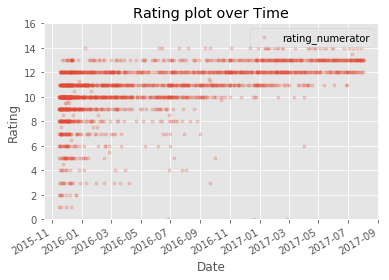

In [8]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df_master.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [9]:
df_master[df_master['rating_numerator'] <= 14]['rating_numerator'].describe()

count    1992.000000
mean       10.545405
std         2.190807
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

- More than 75% of the data has more than 12/10 as rating
- The page start with small rating than they adopt the system of rating numerator more than the denominator
- [Brent has all the right to get mad](http://knowyourmeme.com/memes/theyre-good-dogs-brent) (ratings getting higher with no specific reason)

### Famous Breeds

Text(0,0.5,'dog_breed')

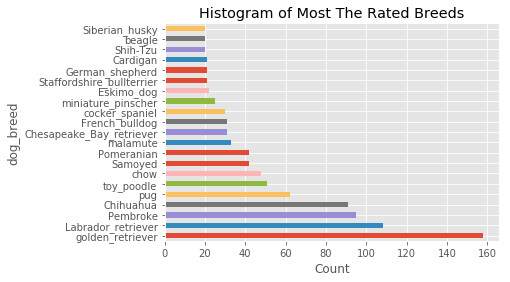

In [10]:
# Without specify the lengh we don't get good result so we will subset our data on the most owned
df_by_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 20)

df_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

- Top two famous breeds are : Golden_retriver and Labrador_retriver according to a meural network that can classify breeds of dogs

### Famous dog gender

Text(0.5,1,'Dog Gender Partitions')

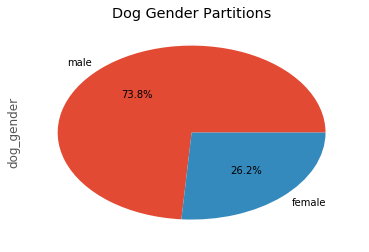

In [11]:
# Plot the data partitioned by dog gender
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')

In [12]:
# Which gender had high ratings
df_master[['dog_gender', 'rating_numerator']][df_master.dog_gender.notnull()].groupby('dog_gender').mean()

,rating_numerator
dog_gender,
female,11.303097
male,10.652123


- According to our treatment (getting the gender from the text of the tweet) we have male dogs more than female dogs in our dataset, whatever the female rating mean more than the male rating mean

### Famous dog Stages

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

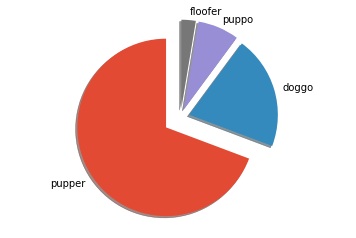

In [13]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



Text(0.5,1,'')

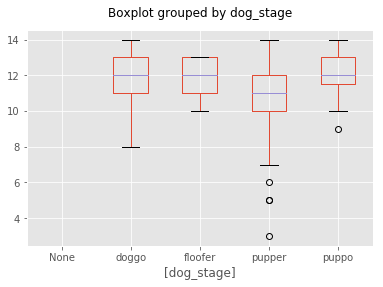

In [14]:
# Plot the dog stages with ratings
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')

In [15]:
#df_master[df_master['dog_stage'] == None].groupby('dog_stage')['rating_numerator'].describe()
df_master[df_master['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()

dog_stage
None             NaN
doggo      11.888889
floofer    11.875000
pupper     10.645142
puppo      12.043478
Name: rating_numerator, dtype: float64

- Puppers represent the big number of our pie, but it has the lowest mean rating

# Conclusion 

The Twitter account WeRateDogs ([@dog_rates](https://twitter.com/dog_rates)) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". It has acquired over 4.50 million followers since its debut.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother - take pictures, send it to @dog_rates and get funny cute comments with high rates :)